<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c3/GradientBoostingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

En este notebook, vamos a realizar un modelo de tipo `GradientBoostingClasifier` utilizando para ello un fichero de Kaggle que lo podemos encontrar en este este enlace:

https://www.kaggle.com/datasets/lodetomasi1995/income-classification

Para ello, en primer lugar importamos los módulos que nos van a ser necesarios para el desarrollo del trabajo. 

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

##Opción descargar datos de Google Drive

In [2]:
##https://drive.google.com/file/d/1VWCqT2W9jr-eaYVEnlvnLLE4SKyv4cRy/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1VWCqT2W9jr-eaYVEnlvnLLE4SKyv4cRy' -O 'income_evaluation.csv'


--2023-02-21 09:05:11--  https://drive.google.com/uc?export=download&id=1VWCqT2W9jr-eaYVEnlvnLLE4SKyv4cRy
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.139, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rv7ksijq822q0daesvfdtsmtg7g8njun/1676970300000/14644984037434537262/*/1VWCqT2W9jr-eaYVEnlvnLLE4SKyv4cRy?e=download&uuid=6eab976a-937a-421d-8c7f-20e0b79ca8b6 [following]
--2023-02-21 09:05:13--  https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rv7ksijq822q0daesvfdtsmtg7g8njun/1676970300000/14644984037434537262/*/1VWCqT2W9jr-eaYVEnlvnLLE4SKyv4cRy?e=download&uuid=6eab976a-937a-421d-8c7f-20e0b79ca8b6
Resolving doc-10-b0-docs.googleusercontent.com (doc-10-b0-docs.googleusercontent.com)... 74.125.142.132, 2607:

##Opción de descargar datos con Kaggle

Otra opción sería descargando los datos directamente de la API de Kaggle, pero para ello tendríamos que crearnos una cuenta en Kaggle, generar una clave (*Account > API > Create New API Token*) y subir el archivo *kaggle.json* resultante a nuestra cuenta de Google Drive.

A continuación incluyo un ejemplo de cómo se haría, aunque no lo vamos a emplear para este laboratorio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
#Buscamos la referencia al dataset que nos interesa
!kaggle datasets list -s income-classification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                          title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lodetomasi1995/income-classification                         Income classification                         459KB  2019-03-26 13:14:12          10905        153  0.5294118        
vardhansiramdasu/income                                      income classification                         319KB  2021-03-11 09:51:33            313         12  0.7647059        
grosvenpaul/family-income-and-expenditure                    Filipino Family Income and Expenditure          4MB  2017-10-05 

In [ ]:
! kaggle datasets download lodetomasi1995/income-classification
! unzip income-classification.zip

income-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  income-classification.zip
replace income_evaluation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: income_evaluation.csv   


##Opción cargar los datos de manera manual

Descargamos los datos de [este enlace](https://www.kaggle.com/datasets/lodetomasi1995/income-classification) a nuestro ordenador. Extraemos los ficheros correspondientes del archivo .zip descargado. Y subimos los ficheros .csv mediante la opción mostrada en la imagen.

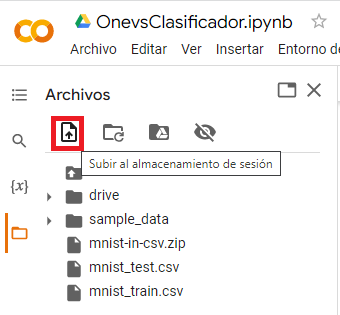

#Preprocesamiento de los datos

Cargamos los datos y evaluamos las dimensiones del mismo, así como el tipo de variables que contiene.

In [3]:
# Cargamos los datos
df = pd.read_csv('income_evaluation.csv')
# dimensiones del fichero
print(df.shape)
# vemos algunos registros
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Las columnas que tiene este fichero son las siguientes:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

Podemos observar que hay muchas columnas con datos alfanuméricos (*object*), las cuales no pueden ser empleadas por este clasificador en este formato. Entonces estas variables las vamos adaptar a sus necesidades, para ello creamos las variables dummies que necesitamos mediante el método `OneHotEncoder()`. Lo hacemos de la siguiente manera:

In [6]:
from sklearn.preprocessing import OneHotEncoder
columns = [' workclass',' education',' marital-status',' occupation',' relationship',
          ' race',' sex',' native-country']
#Instanciamos el método que implementa one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#Llevamos a cabo one-hot encoding en las columnas seleccionadas
encoder_df = pd.DataFrame(encoder.fit_transform(df[columns]).toarray())

El resultado del enconding es el siguiente.

In [7]:
encoder_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Estas variables por sí solas carecen de contexto. Es por ello que añadimos las nuevas variables al fichero inicial.

In [8]:
final_df = df.join(encoder_df)
final_df.columns

Index([            'age',      ' workclass',         ' fnlwgt',
            ' education',  ' education-num', ' marital-status',
           ' occupation',   ' relationship',           ' race',
                  ' sex',
       ...
                      92,                93,                94,
                      95,                96,                97,
                      98,                99,               100,
                     101],
      dtype='object', length=117)

Y procedemos a borrar las columnas iniciales que hemos convertido a variables de tipo dummy.

In [9]:
final_df.drop([' workclass',' education',' marital-status',' occupation',' relationship',
              ' race',' sex',' native-country'], axis=1, inplace=True)
final_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,0,1,2,...,92,93,94,95,96,97,98,99,100,101
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El dataframe `final_df` contiene los datos en el formato adecuado para ser alimentadas al algoritmo de Gradient Boosting.

# Entrenamiento del modelo de Gradient Boosting

Dividimos el dataset en observaciones test y de entrenamiento

In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(" income", axis=1), final_df[" income"], test_size=0.2)

Definimos Gradient Boosting Classifier con algunos hiperparámetros:

*   **n_estimators**: El número de etapas de boosting a realizar. Gradient boosting es bastante robusto al sobreajuste, por lo que un número grande suele dar lugar a un mejor rendimiento. Sin embargo, a mayor número de iteraciones mayor tiempo emplea en el entrenamiento.
*   **max_features**: El número de características a tener en cuenta a la hora de buscar el mejor split o división en cada nodo del árbol.
*   **learning_rate**: La tasa de aprendizaje reduce la contribución de cada árbol por el valor especificado en este parámetro.

In [11]:
# Definimos el modelo
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Ajustamos a los datos (entrenamiento)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [12]:
# La matriz de confusión nos da los valores correctos e
# incorrectamente clasificados
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[4622  292]
 [ 602  997]]


In [13]:
# Accuracy del modelo

print("GBC accuracy es %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

GBC accuracy es 0.86


In [14]:
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4914
        >50K       0.77      0.62      0.69      1599

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



Podemos observar que las métricas anteriores que el modelo no tiene unos niveles de acierto (clasificación correcta) muy elevados, por lo que intentamos buscar otros hiperparámetros que mejoren estos resultados. Lo hacemos apoyándonos en `GridSearchCV()`, de la siguiente manera.

In [15]:
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
from pandas.core.common import random_state
# ¡¡¡¡La ejecuación de esto tarda bastante tiempo !!!!
start = time.time()
print("Comenzamos el Grid Search")
# Definimos los parámetros que queremos probar
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7]
}


gb = GradientBoostingClassifier(n_estimators= 400, random_state=10)
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
end = time.time()
print("Tiempo empleado: ",end - start)
print("Mejores parámetros:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Comenzamos el Grid Search
Tiempo empleado:  1158.34250998497
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 5}
Train Score: 0.8711609336609337
Test Score: 0.8740979579302932


Observamos que algo hemos mejorado, pero no lo suficiente, por lo que intentamos también buscar el número óptimo de árboles (estimadores) que nos permita mejorar los resultado, lo hacemos de la siguiente manera:

In [ ]:
# ¡¡¡¡La ejecuación de esto tarda bastante tiempo !!!!

grid = {'n_estimators':np.arange(0,500,100)}

gb = GradientBoostingClassifier(learning_rate=0.05,max_depth=5)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Mejores parámetros:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Mejores parámetros: {'n_estimators': 300}
Train Score: 0.871698402948403
Test Score: 0.8744050360816827


En los casos de la búsqueda por Grid Search, podemos apreciar que el entrenamiento de `GradientBoostingClassifier()` emplea demasiado tiempo. 

Como vimos en la teoría, existe otro algoritmo llamado [`HistGradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html), el cual es mucho más rápidos para conjuntos de datos grandes como es este caso. Es por ello que vamos a probar el Grid Search con este otro modelo a ver si se obtienen mejores resultados en un periodo más corto de tiempo.

# HistGradientBoostingClassifier

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [17]:
# Definimos Gradient Boosting Classifier con algunos hiperparámetros
hgbc=HistGradientBoostingClassifier(learning_rate=0.05,random_state=100)

# Ajustamos los datos

hgbc.fit(X_train,y_train)

HistGradientBoostingClassifier(learning_rate=0.05, random_state=100)

Una vez entrenado el modelo, validamos los resultados obtenidos contra el conjunto de test.

In [18]:
# La matriz de confusión nos da los valores correctos e
# incorrectamente clasificados
print(confusion_matrix(y_test, hgbc.predict(X_test)))

# Accuracy del modelo
print("HGBC accuracy es %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

[[4628  286]
 [ 550 1049]]
HGBC accuracy es 0.86


Vamos a evaluar si efectivamente esta implementación es más rápida que la anterior. Para ello realizamos el mismo tipo de GridSearch y comparamos el tiempo que lleva completar cada uno de los procesos.

In [ ]:
# ¡¡¡¡La ejecuación de esto tarda bastante tiempo !!!!
start = time.time()
print("Comenzamos el Grid Search")
# Definimos los parámetros que queremos probar
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7]
}


hgb = HistGradientBoostingClassifier(random_state=100)
hgb_cv = GridSearchCV(hgb, grid, cv = 4)
hgb_cv.fit(X_train,y_train)
end = time.time()
print("Tiempo empleado: ",end - start)
print("Mejores parámetros:",hgb_cv.best_params_)
print("Train Score:",hgb_cv.best_score_)
print("Test Score:",hgb_cv.score(X_test,y_test))

Comenzamos el Grid Search
Tiempo empleado:  74.06858444213867
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7}
Train Score: 0.8709305896805897
Test Score: 0.8731767234761246


Vemos que este segundo algoritmo es mucho **más rápido y los resultados son similares**. El anterior tardó 1158 seg (casi 20 mins), mientras que en este caso ha tadado 74 seg, ¡poco más de 1 minuto! 😯

El motivo de este incremento de velocidad es que el algoritmo tradicional de GBT requiere la ordenación de las muestras en cada nodo del árbol (para cada atributo). Por el contrario, `HistGradientBoostingClassifier`no requieren este proceso de ordenación, en su lugar, utiliza una estructura llamada histograma, donde las muestras se ordenan de manera implícita. Este proceso de construcción del histograma se conoce como binning.

Este proceso de binning requiere también la odenación de los valores, pero solo al principio del proceso de boosting y no en cada nodo como en el caso de GBT.

# ¿Existe alguna forma de evitar  `OneHotEncoding`? **CatBoost**

Como se ha explicado en la parte de teoría, una de las grandes ventajas del algoritmo *CatBoos* es que no es necesario hacer ningún preprocesamiento de las variables categóricas, puesto que el algoritmo tiene ya implementado procedimientos para tratarlas de manera automática. Además podemos observar que los resultados obtenidos con este algoritmo son algo mejores que los obtenidos con `HistGradientBoostingClassifier` y `GradientBoostingClassifier`.

Veamos como aplicarlo para este conjunto de datos.

In [19]:
# Primeramente descargamos la librería
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.9 MB/s eta 0:00:00


In [20]:
# Importamos la librería para su uso
from catboost import CatBoostClassifier

Recordemos rápidamente cómo era el dataset orignal que cargamos al principio de este notebook.

In [21]:
# dimensiones del fichero
print("Dimensiones del fichero: {} filas y {} columnas\n".format(df.shape[0],df.shape[1]))
# vemos algunos registros
df.head()

Dimensiones del fichero: 32561 filas y 15 columnas



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

Creamos un nuevo conjunto de train/test con los datos originales.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(" income", axis=1), df[" income"], test_size=0.2, random_state=456)

In [23]:
cat_clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    train_dir = "content" #Directorio para almacenar datos del proceso de entrenamiento
)

In [24]:
feat_cols = list(range(0, X_train.shape[1]))

In [25]:
cat_clf.fit(
    X_train, y_train,
    cat_features=feat_cols,
    eval_set=(X_test, y_test)
)

0:	learn: 0.4731143	test: 0.4666534	best: 0.4666534 (0)	total: 85.1ms	remaining: 4.17s
1:	learn: 0.3927283	test: 0.3823539	best: 0.3823539 (1)	total: 112ms	remaining: 2.69s
2:	learn: 0.3504563	test: 0.3377438	best: 0.3377438 (2)	total: 135ms	remaining: 2.11s
3:	learn: 0.3291641	test: 0.3146809	best: 0.3146809 (3)	total: 166ms	remaining: 1.91s
4:	learn: 0.3167738	test: 0.3008089	best: 0.3008089 (4)	total: 187ms	remaining: 1.68s
5:	learn: 0.3073434	test: 0.2909214	best: 0.2909214 (5)	total: 214ms	remaining: 1.57s
6:	learn: 0.3017504	test: 0.2845078	best: 0.2845078 (6)	total: 236ms	remaining: 1.45s
7:	learn: 0.2972274	test: 0.2797331	best: 0.2797331 (7)	total: 263ms	remaining: 1.38s
8:	learn: 0.2933762	test: 0.2753779	best: 0.2753779 (8)	total: 285ms	remaining: 1.3s
9:	learn: 0.2914909	test: 0.2736517	best: 0.2736517 (9)	total: 309ms	remaining: 1.24s
10:	learn: 0.2900955	test: 0.2720795	best: 0.2720795 (10)	total: 347ms	remaining: 1.23s
11:	learn: 0.2884783	test: 0.2698768	best: 0.2698768

In [26]:
print(confusion_matrix(y_test, cat_clf.predict(X_test)))

[[4691  263]
 [ 508 1051]]


In [27]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, cat_clf.predict(X_test)))

GBC accuracy is 0.88


In [28]:
from sklearn.metrics import classification_report

pred=cat_clf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92      4954
        >50K       0.80      0.67      0.73      1559

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513



In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
import time
# ¡¡¡¡La ejecuación de esto tarda bastante tiempo !!!!
start = time.time()
print("Comenzamos el Grid Search")
# Definimos los parámetros que queremos probar
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'depth':[3,5,7]
}


cb = CatBoostClassifier(n_estimators= 400, random_state=10)
cb_cv = GridSearchCV(cb, grid, cv = 4)
cb_cv.fit(X_train,y_train,
          cat_features=feat_cols,
          eval_set=(X_test, y_test),
          verbose=False)
end = time.time()
print("Tiempo empleado: ",end - start)
print("Mejores parámetros:",cb_cv.best_params_)
print("Train Score:",cb_cv.best_score_)
print("Test Score:",cb_cv.score(X_test,y_test))

Comenzamos el Grid Search
Tiempo empleado:  605.0252690315247
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 3}
Train Score: 0.8730804668304668
Test Score: 0.8811607554122525


Tarda menos que `GradientBoostingClassifier`, pero más que `HistGradientBoostingClassifier`. Esto puede deberse, entre otros motivos, al tratamiento automático que hace de las variables categoricas.